In [ ]:
import numpy as np
from scipy.stats.stats import pearsonr

import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = '/content/gdrive/My Drive/data/image_retrieval2/'
data = np.load(PATH+'images_mr.npy', allow_pickle=True)
print(data.shape)

data = data.astype(np.float32)
print(type(data[0,0,0,0]))

data = preprocess_input(data)
print(data.shape)

(9908, 86, 128, 3)
<class 'numpy.float32'>
(9908, 86, 128, 3)


In [ ]:
# compute feature
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(86, 128, 3))

data_features = model.predict(data)
print(data_features.shape)

58892288/58889256 [==============================] - 1s 0us/step
(9908, 2, 4, 512)


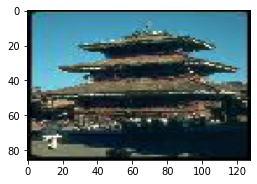

In [ ]:
# load query
import matplotlib
import matplotlib.pyplot as plt

query = kimage.load_img(PATH+'q2.jpg', target_size=(86, 128))

plt.figure(figsize=(4,4))
plt.imshow(query)

In [ ]:
# compute features for query
query_np = kimage.img_to_array(query)
query_np = np.expand_dims(query_np, axis=0)
query_np = preprocess_input(query_np)

query_features = model.predict(query_np)
print(query_features.shape)

(1, 2, 4, 512)


In [ ]:
# Prepare for computing correlation
query_features = np.reshape(query_features, (1, -1))
data_features  = np.reshape(data_features, (data.shape[0], -1))

print(query_features.shape)
print(data_features.shape)

(1, 4096)
(9908, 4096)


In [ ]:
# compute correlation
corr_list = []
for i in range(data.shape[0]):
  corr = pearsonr(query_features[0], data_features[i])
  corr_list.append(corr)
print(len(corr_list))

9908


In [ ]:
def getKey(item):
    return item[0]

lists = [i for i in range(data.shape[0])]
tps = zip(corr_list, lists)
tps_sorted = sorted(tps, key=getKey, reverse=True)

for i in range(8):
    print(tps_sorted[i])

((0.9999999999890958, 0.0), 3425)
((0.6546572815557616, 0.0), 3478)
((0.6291991703342068, 0.0), 3586)
((0.6174109950790554, 0.0), 3411)
((0.5900581988911643, 0.0), 3407)
((0.5824186972433839, 0.0), 3662)
((0.566906123273291, 0.0), 319)
((0.5617518414767246, 0.0), 3376)


In [ ]:
PATH = '/content/gdrive/My Drive/data/image_retrieval2/'
data_show = np.load(PATH+'images_mr.npy', allow_pickle=True)
data_show = data_show.astype(np.float32)
print(data_show.shape)

(9908, 86, 128, 3)


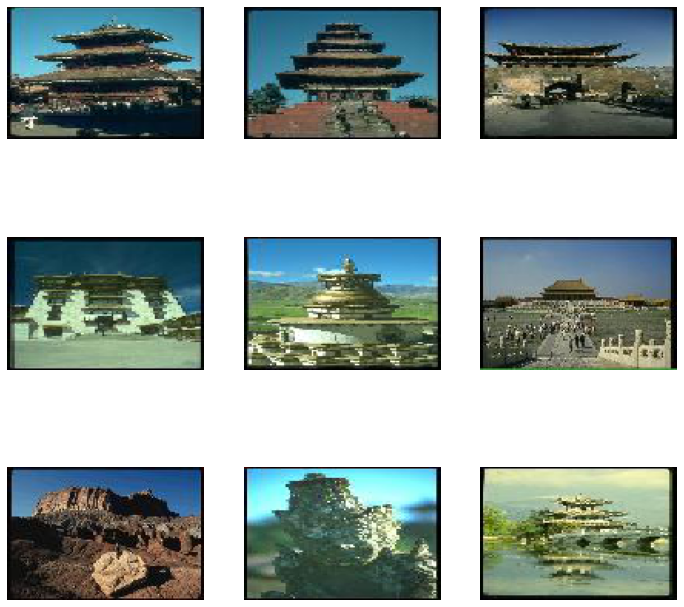

In [ ]:
fig = plt.figure(figsize=(12,12))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tps_sorted[i-1][1]

    img = data_show[index]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img/255.0)

In [ ]:
# save computed features
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(86, 128, 3))

pred_data  = model.predict(data)
print(pred_data.shape)

pred_data  = tf.reshape(pred_data, (9908,-1))
print(pred_data.shape)
np.save(PATH+'images_features.npy', pred_data.numpy())

In [ ]:
PATH = '/content/gdrive/My Drive/data/image_retrieval2/'
data = np.load(PATH+'images_mr.npy', allow_pickle=True)
data = data.astype(np.float32)

data = preprocess_input(data)
pred_data  = model.predict(data)
print(pred_data.shape)

(9908, 2, 4, 512)
